<h1> Small Image Classification Using Convolutional Neural Network (CNN)
</h1>

In this notebook, I will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes. I will use CNN for classification



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train and y_test are a 2D array, for our classification having 1D array is good enough. so I will convert this to now 1D array

In [11]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [13]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [14]:
def plot_sample(X, y, index) :
  plt.figure(figsize= (15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

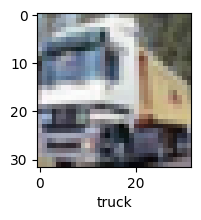

In [15]:
plot_sample(X_train, y_train, 1)

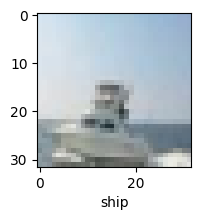

In [16]:
plot_sample(X_train, y_train, 100)

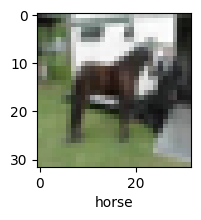

In [17]:
plot_sample(X_test, y_test, 20)

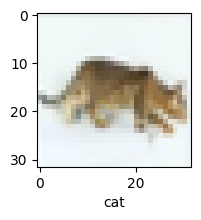

In [19]:
plot_sample(X_test, y_test, 3900)

<b>- Normalizing the data </b>

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [20]:
X_train =  X_train / 255.0
X_test = X_test / 255.0

<b>- Build simple artificial neural network for image classification </b>

In [21]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 366s 233ms/step - accuracy: 0.2743 - loss: 2.2701
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 347s 211ms/step - accuracy: 0.3971 - loss: 1.6853
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 407s 227ms/step - accuracy: 0.4282 - loss: 1.5888
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 380s 226ms/step - accuracy: 0.4535 - loss: 1.5287
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 397s 236ms/step - accuracy: 0.4664 - loss: 1.4926


In the last epoch the accuracy is at around 46% (very low)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.54      0.49      0.52      1000
           1       0.63      0.50      0.56      1000
           2       0.43      0.12      0.19      1000
           3       0.38      0.23      0.28      1000
           4       0.36      0.50      0.42      1000
           5       0.41      0.33      0.37      1000
           6       0.50      0.49      0.50      1000
           7       0.41      0.61      0.49      1000
           8       0.53      0.61      0.57      1000
           9       0.42      0.68      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.44     10000
weighted avg       0.46      0.46      0.44     10000



<b>- convolutional neural network </b>

In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.3900 - loss: 1.6823
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.6064 - loss: 1.1243
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.6574 - loss: 0.9830
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.6905 - loss: 0.8888
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7200 - loss: 0.8050
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 56ms/step - accuracy: 0.7415 - loss: 0.7408
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 40ms/step - accuracy: 0.7586 - loss: 0.6948
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.7756 - loss: 0.6412
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7937 - loss: 0.6010
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.8101 - loss: 0.5487


In [26]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7118 - loss: 0.9081


[0.9162924885749817, 0.7121000289916992]

In [27]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[1.2209687e-04, 1.9061015e-04, 1.4555771e-03, 8.6596167e-01,
        5.1247724e-04, 1.2564419e-01, 3.4717735e-04, 1.1341891e-04,
        5.6380508e-03, 1.4582613e-05],
       [5.8967859e-04, 1.8010605e-02, 6.4053052e-07, 2.4544983e-08,
        6.3271743e-09, 5.6431737e-10, 2.5711087e-09, 5.1077476e-11,
        9.8135817e-01, 4.0862222e-05],
       [1.0000754e-01, 5.7331306e-01, 1.5375852e-03, 1.9828862e-02,
        1.3851080e-03, 2.4324986e-04, 2.4815992e-04, 8.8843554e-03,
        2.8174105e-01, 1.2811019e-02],
       [9.9560517e-01, 1.8290721e-04, 2.7266652e-03, 1.2301271e-04,
        3.1170690e-05, 6.3468036e-08, 2.7636502e-06, 4.5576885e-06,
        1.2963571e-03, 2.7213890e-05],
       [8.5065398e-07, 3.9267070e-05, 5.6156520e-02, 6.8515576e-02,
        7.1063763e-01, 1.7685794e-03, 1.6283086e-01, 1.1089531e-06,
        4.9251048e-05, 3.3960040e-07]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

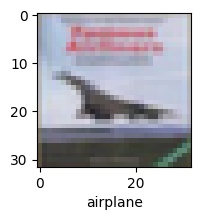

In [30]:
plot_sample(X_test, y_test,3)

In [31]:
classes[y_classes[3]]

'airplane'

In [32]:
classes[y_classes[3]]

'airplane'